# Bienvenidos al Hackathon Barcelona este repositorio es creado por Josue(Data_pathfinder)(https://josh1313.github.io/JoshProyecgithhub.io/)
iNSTRUCCIONES:
Paso 1: Preprocesamiento y PCA en 2 Conjuntos de Datos

 Realizare un preprocesamiento y aplicare un Análisis de Componentes Principales (PCA) a dos conjuntos de datos proporcionados. Uno de los conjuntos, llamado "lloguer_prem_trim," es el conjunto de datos base. El otro conjunto, "accidents_causa_conductor," es el que he elegido para el análisis.

Objetivo:

Limpiar y preparar los datos para el análisis.
Aplicar el PCA para reducir la dimensionalidad y descubrir patrones subyacentes en ambos conjuntos de datos.
Pasos a seguir:

Realizar el preprocesamiento de datos en ambos conjuntos para abordar valores atípicos y datos faltantes, y estandarizar las características si es necesario.
Aplicar el PCA a "lloguer_prem_trim" y "accidents_causa_conductor"  para reducir la dimensionalidad y analizar los componentes principales.
Analizar los resultados del PCA para comprender mejor la estructura del conjunto de datos

Iniciaremos con un EDA  por cada conjunto de datos y despues de hacer unos cambios , los juntaremos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

df = pd.read_csv(r"C:\Users\JOSUE\Downloads\hackathon\2017_accidents_causa_conductor_gu_bcn_.csv")

In [2]:
df.shape

(11091, 20)

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11091 entries, 0 to 11090
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Numero_expedient            11091 non-null  object 
 1   Codi_districte              11091 non-null  int64  
 2   Nom_districte               11091 non-null  object 
 3   Codi_barri                  11091 non-null  int64  
 4   Nom_barri                   11091 non-null  object 
 5   Codi_carrer                 11091 non-null  int64  
 6   Nom_carrer                  11091 non-null  object 
 7   Num_postal                  11089 non-null  object 
 8   Descripcio_dia_setmana      11091 non-null  object 
 9   NK_Any                      11091 non-null  int64  
 10  Mes_any                     11091 non-null  int64  
 11  Nom_mes                     11091 non-null  object 
 12  Dia_mes                     11091 non-null  int64  
 13  Hora_dia                    110

,Codi_districte,Codi_barri,Codi_carrer,NK_Any,Mes_any,Dia_mes,Hora_dia,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud,Latitud
count,11091.000000,11091.000000,11091.000000,11091.0,11091.000000,11091.000000,11091.000000,11091.000000,1.109100e+04,11091.000000,11091.000000
mean,4.760256,26.603462,241016.328014,2017.0,6.505816,15.802362,13.760346,430116.605946,4.583624e+06,2.162875,41.399275
std,3.048208,22.200196,193940.152293,0.0,3.435091,8.757472,5.300569,2030.298735,2.346035e+03,0.024180,0.021200
min,-1.000000,-1.000000,-1.000000,2017.0,1.000000,1.000000,0.000000,424208.090000,4.575198e+06,2.091855,41.323094
25%,2.000000,8.000000,110009.000000,2017.0,4.000000,8.000000,10.000000,428614.300000,4.582190e+06,2.144985,41.386288
50%,4.000000,19.000000,191204.000000,2017.0,6.000000,16.000000,14.000000,430155.920000,4.583336e+06,2.163448,41.396713
75%,7.000000,43.000000,312400.000000,2017.0,10.000000,23.000000,18.000000,431572.690000,4.584891e+06,2.180188,41.410826
max,10.000000,73.000000,701864.000000,2017.0,12.000000,31.000000,23.000000,435119.930000,4.591264e+06,2.222572,41.468244


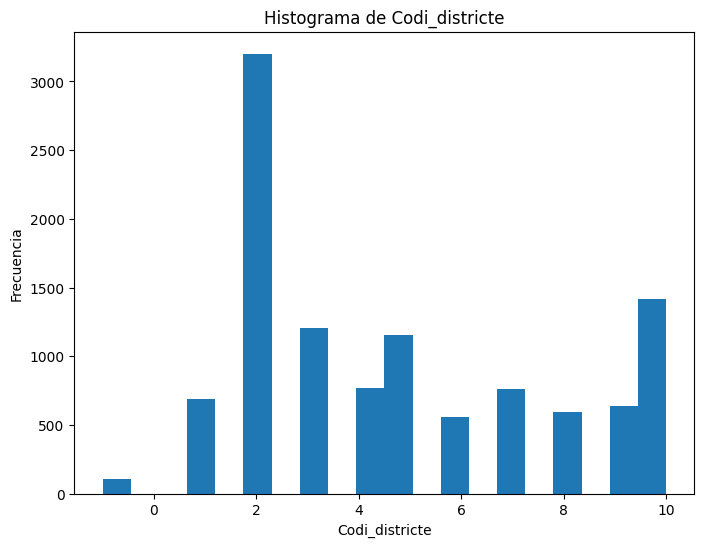

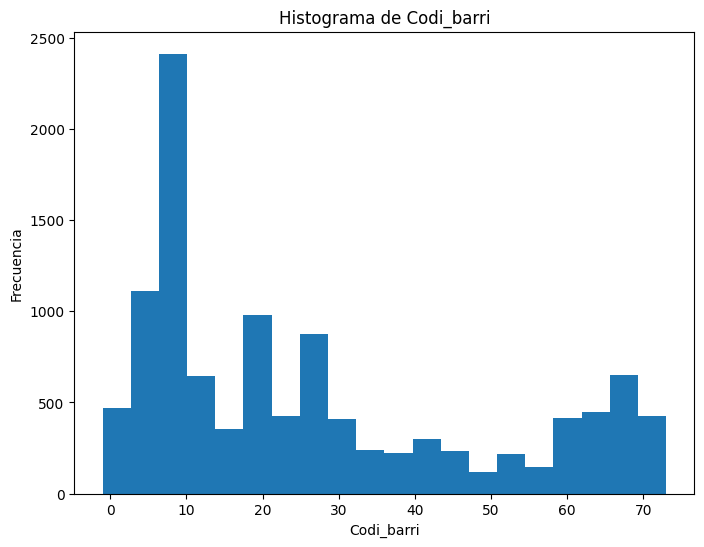

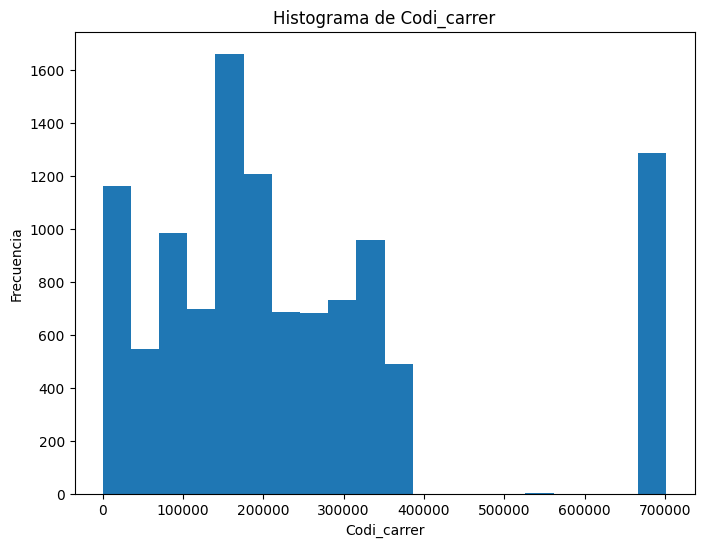

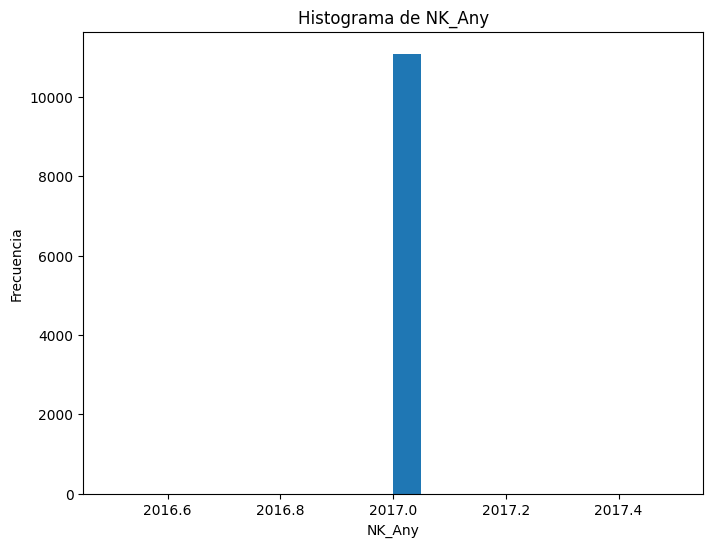

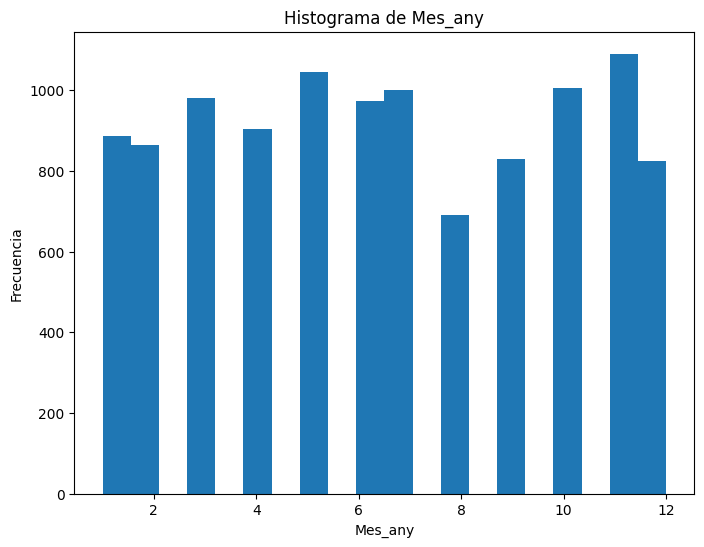

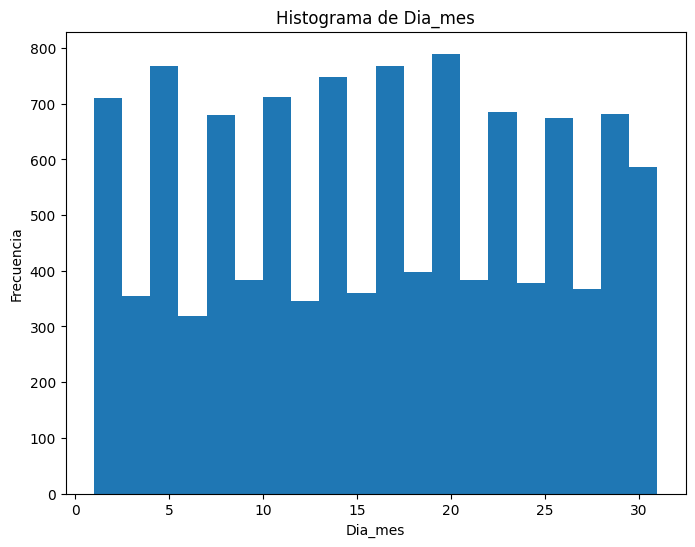

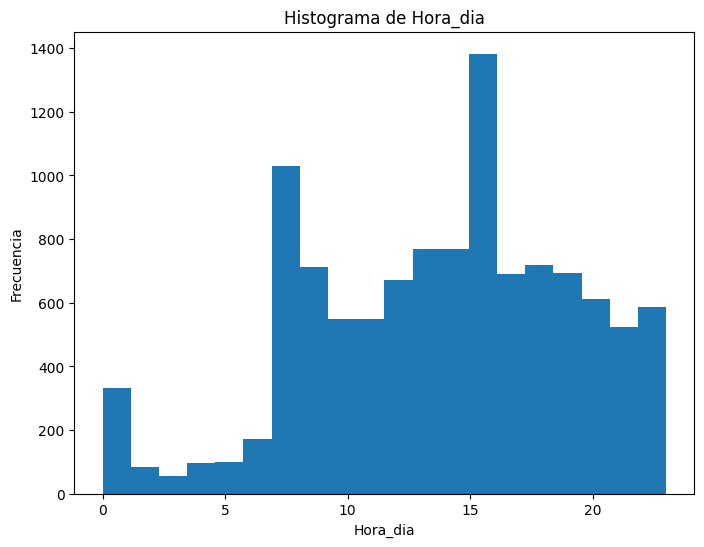

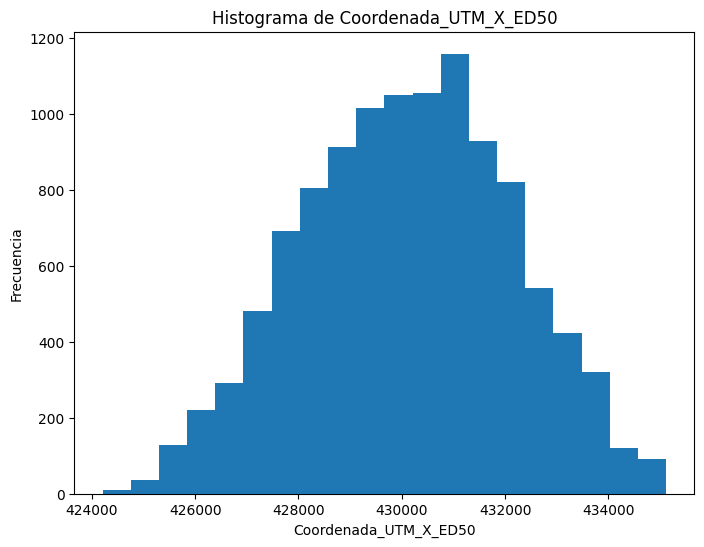

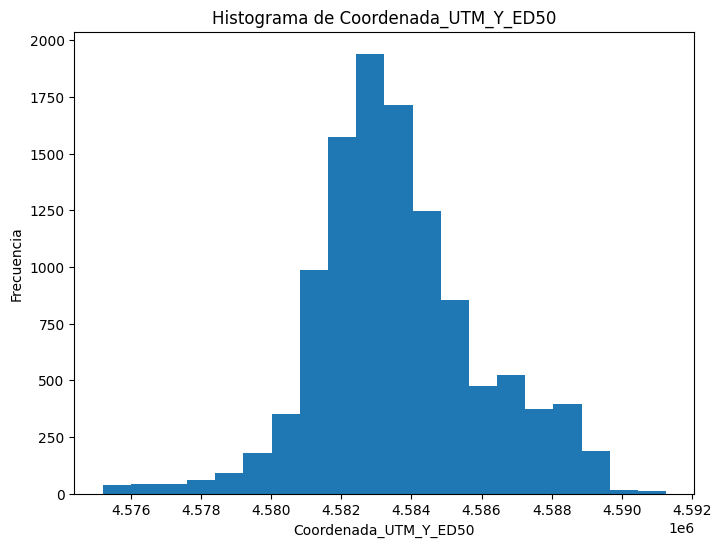

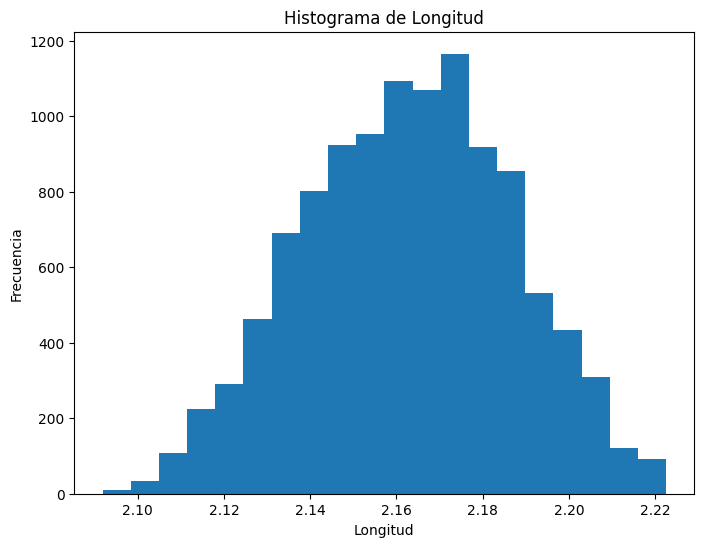

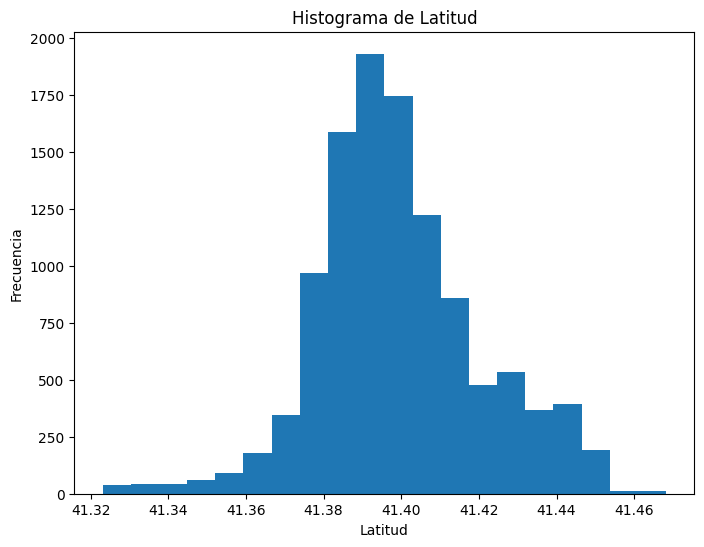

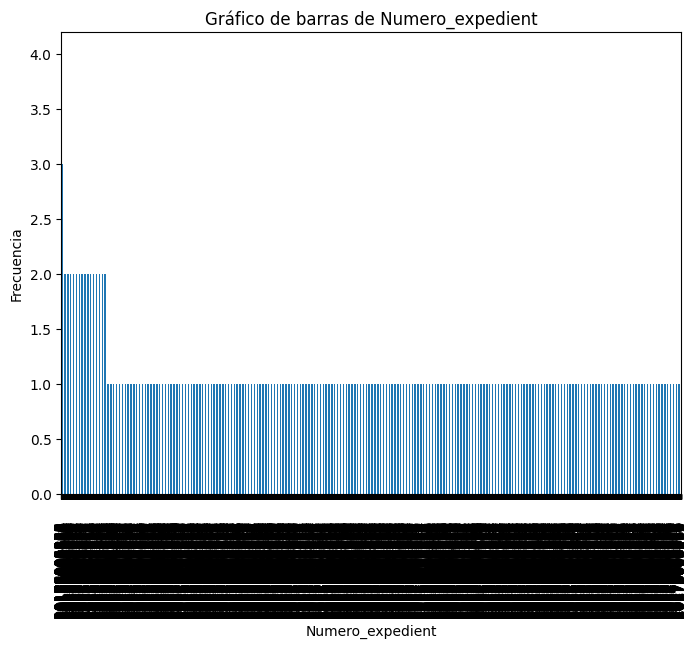

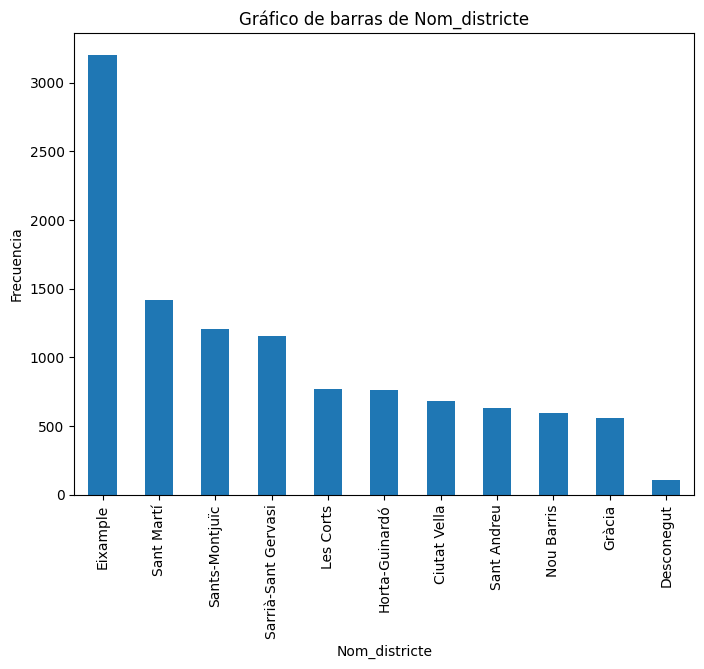

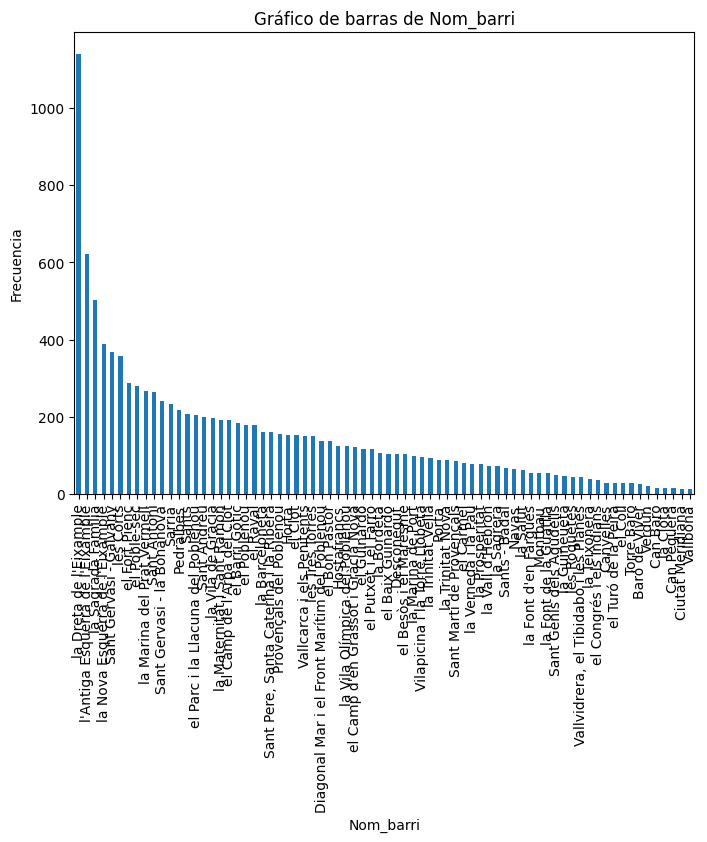

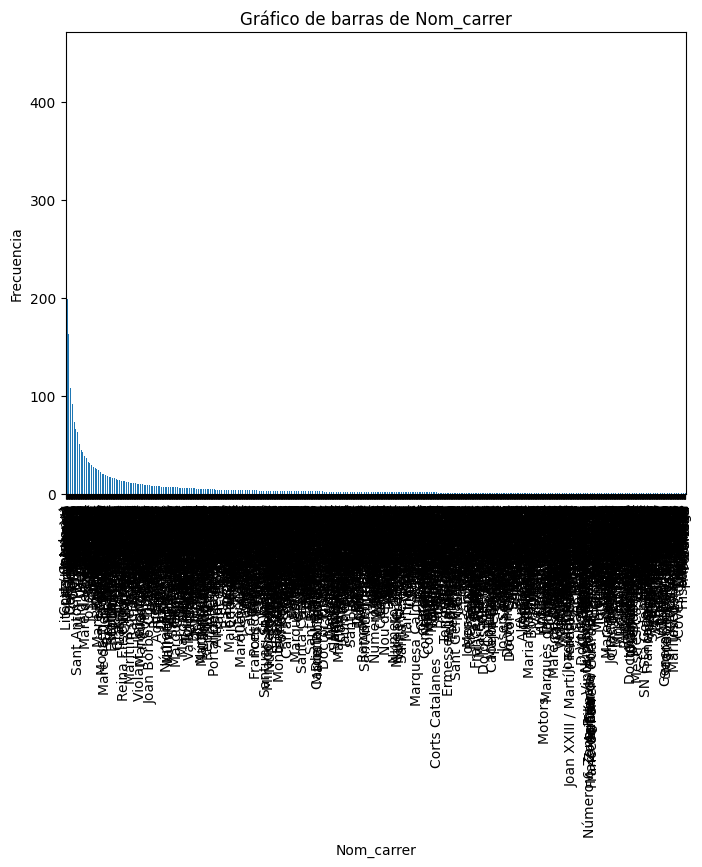

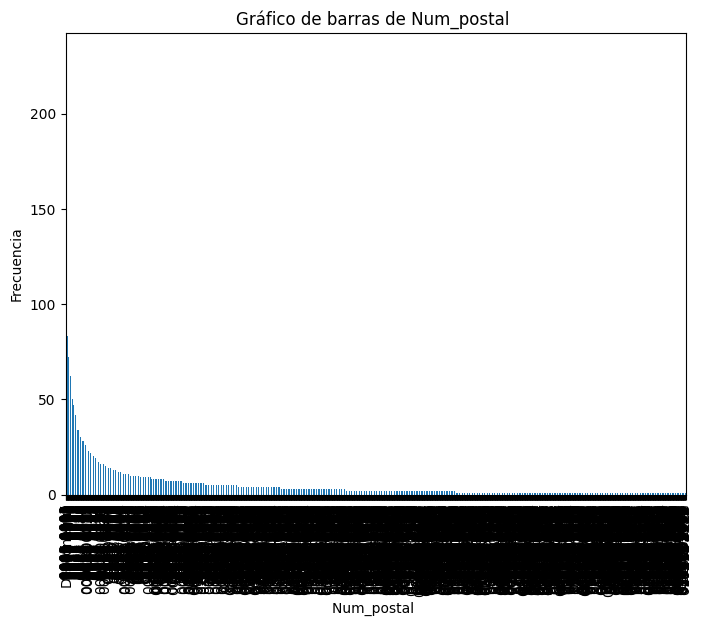

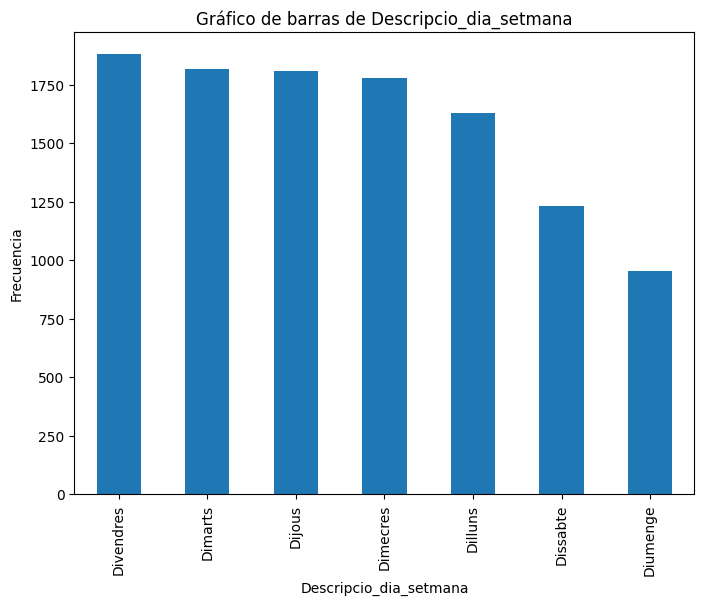

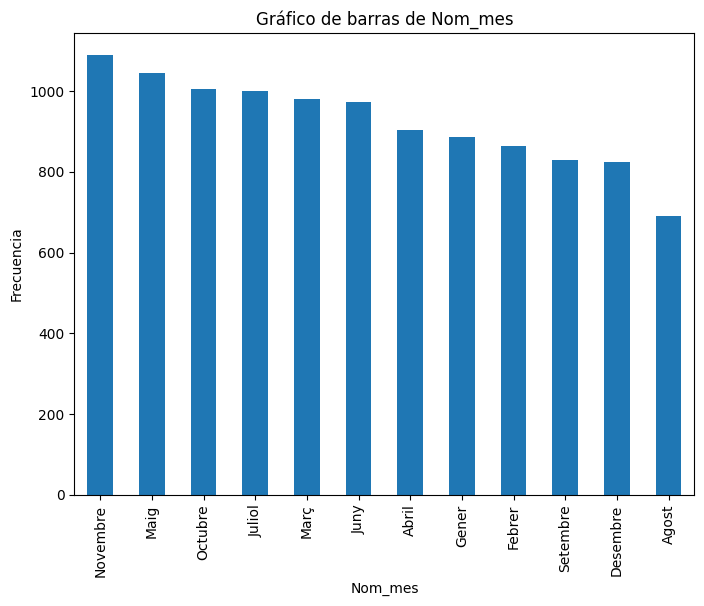

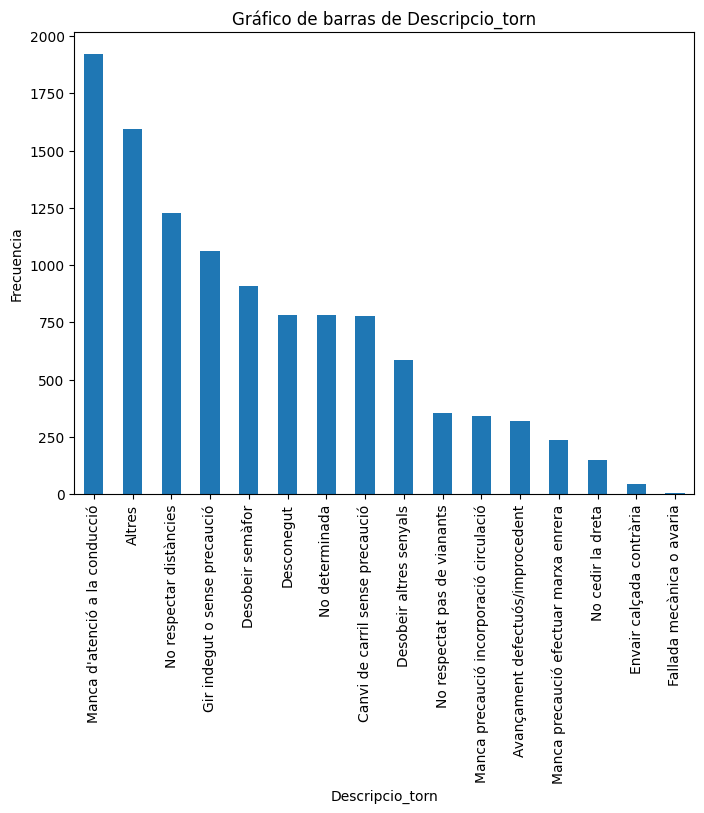

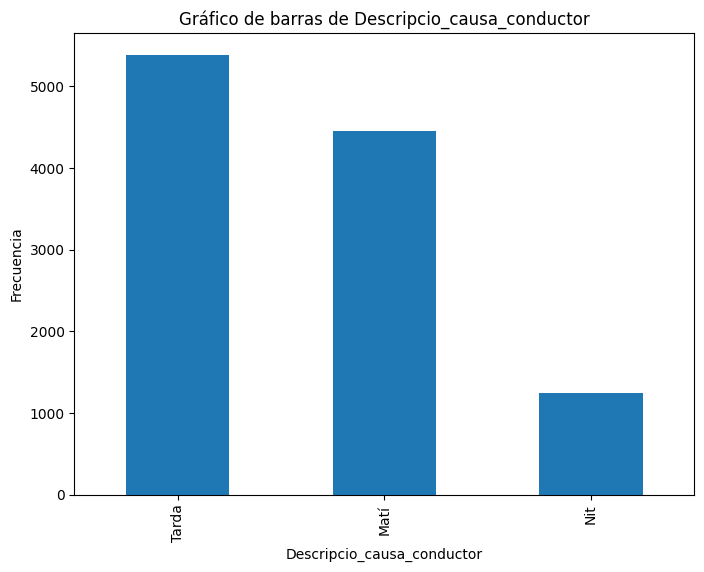

In [4]:
def plot_variables(df):
    # Obteniendo listas de columnas por tipo de datos
    numeric_cols = df.select_dtypes(include=['int', 'float']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    boolean_cols = df.select_dtypes(include=['bool']).columns

    # Graficar variables numéricas
    for col in numeric_cols:
        plt.figure(figsize=(8, 6))
        plt.hist(df[col], bins=20)
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.title(f'Histograma de {col}')
        plt.show()

    # Graficar variables categóricas
    for col in categorical_cols:
        plt.figure(figsize=(8, 6))
        df[col].value_counts().plot(kind='bar')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.title(f'Gráfico de barras de {col}')
        plt.show()

    # Graficar variables booleanas
    for col in boolean_cols:
        plt.figure(figsize=(8, 6))
        df[col].value_counts().plot(kind='bar')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.title(f'Gráfico de barras de {col}')
        plt.show()


plot_variables(df)

In [5]:
df.isnull().sum()

Numero_expedient              0
Codi_districte                0
Nom_districte                 0
Codi_barri                    0
Nom_barri                     0
Codi_carrer                   0
Nom_carrer                    0
Num_postal                    2
Descripcio_dia_setmana        0
NK_Any                        0
Mes_any                       0
Nom_mes                       0
Dia_mes                       0
Hora_dia                      0
Descripcio_torn               0
Descripcio_causa_conductor    0
Coordenada_UTM_X_ED50         0
Coordenada_UTM_Y_ED50         0
Longitud                      0
Latitud                       0
dtype: int64

In [6]:
df.dropna(subset=Num_postal, inplace=True)

NameError: name 'Num_postal' is not defined

In [ ]:
df.duplicated().sum()

0

Revisaremos la variable desconegut y si no hay informacion valiosa o pertinente a otro barrio o calle la borraremos ya que hace mas ruido de lo que ayuda

In [ ]:
filtro = df['Nom_districte'] == 'Desconegut'
conjunto_filtrado = df[filtro]


In [ ]:
conjunto_filtrado = conjunto_filtrado.reset_index(drop=True)

In [ ]:
conjunto_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Numero_expedient            104 non-null    object 
 1   Codi_districte              104 non-null    int64  
 2   Nom_districte               104 non-null    object 
 3   Codi_barri                  104 non-null    int64  
 4   Nom_barri                   104 non-null    object 
 5   Codi_carrer                 104 non-null    int64  
 6   Nom_carrer                  104 non-null    object 
 7   Num_postal                  102 non-null    object 
 8   Descripcio_dia_setmana      104 non-null    object 
 9   NK_Any                      104 non-null    int64  
 10  Mes_any                     104 non-null    int64  
 11  Nom_mes                     104 non-null    object 
 12  Dia_mes                     104 non-null    int64  
 13  Hora_dia                    104 non

In [ ]:
conjunto_filtrado['Nom_carrer'].value_counts()

Nom_carrer
Desconegut                                            93
Corts Catalanes                                        2
Motors                                                 1
Joan XXIII / Martí i Franquès                          1
Número 6 Zona Franca / A Zona Franca                   1
Aguilar                                                1
Zona Franca                                            1
Aribau                                                 1
Sentís                                                 1
Mare de Déu de Port                                    1
Francesc Ferrer i Guàrdia                              1
Name: count, dtype: int64

In [ ]:
# borraremos la filas Desconegut ya que no aportan
df = df[df['Nom_districte'] != 'Desconegut']


In [ ]:
# reseteamos el indice df3
df = df.reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10987 entries, 0 to 10986
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Numero_expedient            10987 non-null  object 
 1   Codi_districte              10987 non-null  int64  
 2   Nom_districte               10987 non-null  object 
 3   Codi_barri                  10987 non-null  int64  
 4   Nom_barri                   10987 non-null  object 
 5   Codi_carrer                 10987 non-null  int64  
 6   Nom_carrer                  10987 non-null  object 
 7   Num_postal                  10987 non-null  object 
 8   Descripcio_dia_setmana      10987 non-null  object 
 9   NK_Any                      10987 non-null  int64  
 10  Mes_any                     10987 non-null  int64  
 11  Nom_mes                     10987 non-null  object 
 12  Dia_mes                     10987 non-null  int64  
 13  Hora_dia                    109

In [ ]:
len(df[df.duplicated()])


0

In [ ]:
# cambiamos a minusculas todos los nombres de las variables para hacer el merge
df.columns = df.columns.str.lower()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10987 entries, 0 to 10986
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   numero_expedient            10987 non-null  object 
 1   codi_districte              10987 non-null  int64  
 2   nom_districte               10987 non-null  object 
 3   codi_barri                  10987 non-null  int64  
 4   nom_barri                   10987 non-null  object 
 5   codi_carrer                 10987 non-null  int64  
 6   nom_carrer                  10987 non-null  object 
 7   num_postal                  10987 non-null  object 
 8   descripcio_dia_setmana      10987 non-null  object 
 9   nk_any                      10987 non-null  int64  
 10  mes_any                     10987 non-null  int64  
 11  nom_mes                     10987 non-null  object 
 12  dia_mes                     10987 non-null  int64  
 13  hora_dia                    109

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df['nom_carrer'].value_counts())

nom_carrer
Corts Catalanes                449
Diagonal                       388
Aragó                          278
Litoral (Llobregat)            220
València                       199
Meridiana                      176
Dalt (Besòs)                   165
Mallorca                       164
Litoral (Besòs)                139
Gràcia                         126
Balmes                         117
Còrsega                        108
Dalt (Llobregat)                97
Diputació                       95
Muntaner                        93
Consell de Cent                 92
Provença                        92
Marina                          90
Rosselló                        85
General Mitre                   79
Paral·lel                       75
Lepant                          74
Comte d'Urgell                  73
Sant Joan                       70
Augusta                         67
Sants                           66
Aribau                          66
Catalunya                       66
Sardenya 

In [ ]:
count_calles = df['nom_carrer'].value_counts()
calles_menos_de_50 = count_calles[count_calles < 50].index
df.loc[df['nom_carrer'].isin(calles_menos_de_50), 'nom_carrer'] = 'Menos_50_incidencias'



In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df['nom_carrer'].value_counts())

nom_carrer
Menos_50_incidencias        6772
Corts Catalanes              449
Diagonal                     388
Aragó                        278
Litoral (Llobregat)          220
València                     199
Meridiana                    176
Dalt (Besòs)                 165
Mallorca                     164
Litoral (Besòs)              139
Gràcia                       126
Balmes                       117
Còrsega                      108
Dalt (Llobregat)              97
Diputació                     95
Muntaner                      93
Consell de Cent               92
Provença                      92
Marina                        90
Rosselló                      85
General Mitre                 79
Paral·lel                     75
Lepant                        74
Comte d'Urgell                73
Sant Joan                     70
Augusta                       67
Sants                         66
Sardenya                      66
Catalunya                     66
Aribau                        66

In [ ]:
df.head(5)

,numero_expedient,codi_districte,nom_districte,codi_barri,nom_barri,codi_carrer,nom_carrer,num_postal,descripcio_dia_setmana,nk_any,mes_any,nom_mes,dia_mes,hora_dia,descripcio_torn,descripcio_causa_conductor,coordenada_utm_x_ed50,coordenada_utm_y_ed50,longitud,latitud
0,2017S010628,10,Sant Martí,64,el Camp de l'Arpa del Clot,226400,Menos_50_incidencias,0293 0293,Diumenge,2017,12,Desembre,24,0,Gir indegut o sense precaució,Nit,432141.03,4585382.64,2.190956,41.409311
1,2017S003663,10,Sant Martí,64,el Camp de l'Arpa del Clot,226400,Menos_50_incidencias,0323 0325,Dilluns,2017,4,Abril,24,21,Desobeir semàfor,Tarda,432024.02,4585501.49,2.196339,41.413514
2,2017S010680,10,Sant Martí,64,el Camp de l'Arpa del Clot,161407,Indústria,0303 0303,Dimarts,2017,12,Desembre,26,20,No determinada,Tarda,431863.93,4585505.67,2.187887,41.414538
3,2017S003193,10,Sant Martí,64,el Camp de l'Arpa del Clot,194406,Maragall,0052 0054,Dijous,2017,4,Abril,6,14,Desconegut,Tarda,431629.04,4585416.36,2.195267,41.416687
4,2017S008857,10,Sant Martí,64,el Camp de l'Arpa del Clot,297001,Sant Antoni Maria Claret,0248 0250,Dijous,2017,10,Octubre,26,9,Desobeir semàfor,Matí,431181.73,4585030.22,2.191832,41.409389


In [ ]:
# Lista de las columnas a borrar
columnas_a_borrar = [ 'nom_barri','nom_districte','codi_carrer','latitud', 'longitud', 'coordenada_utm_y_ed50', 'coordenada_utm_x_ed50', 'hora_dia', 'dia_mes', 'nom_mes', 'mes_any', 'nk_any']
# Borra las columnas
df = df.drop(columns=columnas_a_borrar)


In [ ]:
df = pd.get_dummies(df, columns=['nom_carrer','descripcio_torn','descripcio_dia_setmana', 'descripcio_causa_conductor'], prefix='', prefix_sep='')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10987 entries, 0 to 10986
Data columns (total 66 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   numero_expedient                         10987 non-null  object
 1   codi_districte                           10987 non-null  int64 
 2   codi_barri                               10987 non-null  int64 
 3   num_postal                               10987 non-null  object
 4   Aragó                                    10987 non-null  bool  
 5   Aribau                                   10987 non-null  bool  
 6   Augusta                                  10987 non-null  bool  
 7   Balmes                                   10987 non-null  bool  
 8   C-31                                     10987 non-null  bool  
 9   Catalunya                                10987 non-null  bool  
 10  Comte d'Urgell                           10987 non-null  b

In [ ]:
columnas_binarias = ['Dijous','Dilluns','Dimarts', 'Dimecres', 'Dissabte', 'Diumenge', 'Divendres','Matí', 'Nit', 'Tarda']
df[columnas_binarias] = df[columnas_binarias].astype(int)

In [7]:
df.head(1)

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_conductor,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud,Latitud
0,2017S004939,-1,Desconegut,-1,Desconegut,-1,Motors ...,43-51,Dimarts,2017,6,Juny,6,8,Desobeir altres senyals,Matí,427585.89,4577869.16,2.191767,41.411606


In [10]:
numeric_cols = df.select_dtypes(include=['int', 'float']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
boolean_cols = df.select_dtypes(include=['bool']).columns


In [11]:
numeric_cols

Index(['Codi_districte', 'Codi_barri', 'Codi_carrer', 'NK_Any', 'Mes_any',
       'Dia_mes', 'Hora_dia', 'Coordenada_UTM_X_ED50', 'Coordenada_UTM_Y_ED50',
       'Longitud', 'Latitud'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10987 entries, 0 to 10986
Data columns (total 66 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   numero_expedient                         10987 non-null  object
 1   codi_districte                           10987 non-null  int64 
 2   codi_barri                               10987 non-null  int64 
 3   num_postal                               10987 non-null  object
 4   Aragó                                    10987 non-null  bool  
 5   Aribau                                   10987 non-null  bool  
 6   Augusta                                  10987 non-null  bool  
 7   Balmes                                   10987 non-null  bool  
 8   C-31                                     10987 non-null  bool  
 9   Catalunya                                10987 non-null  bool  
 10  Comte d'Urgell                           10987 non-null  b

In [ ]:
group_data = df3.groupby(['codi_districte', 'codi_barri']).agg({'numero_expedient': 'count', 'nom_districte': 'first', 'nom_barri': 'first', 'codi_carrer': 'first', 'nom_carrer': 'first', 'num_postal ': 'first', 'codi_carrer':  'first', 'descripcio_dia_setmana': 'first', 'nk_any': 'first', 'mes_any': 'first','nom_mes': 'first','dia_mes':'first', 'hora_dia':'first', 'descripcio_torn': 'first', 'descripcio_causa_conductor': 'first', 'coordenada_utm_x_ed50':'first', 'coordenada_utm_y_ed50': 'first', 'longitud': 'first','latitud':'first'})

In [ ]:
group_data.head(5)

numero_expedient nom_districte   
codi_districte codi_barri                                   
1              1                        179  Ciutat Vella  \
               2                        184  Ciutat Vella   
               3                        162  Ciutat Vella   
               4                        160  Ciutat Vella   
2              5                        288      Eixample   

                                                       nom_barri  codi_carrer   
codi_districte codi_barri                                                       
1              1                                        el Raval       701349  \
               2                                  el Barri Gòtic        74404   
               3                                  la Barceloneta       701265   
               4           Sant Pere, Santa Caterina i la Ribera       240707   
2              5                                   el Fort Pienc       169409   

                                nom_carrer num_postal  descripcio_dia_setmana   
codi_districte codi_barri                                                       
1              1               Menos de 50   0001 0001                Dimarts  \
               2                 Catalunya   0018 0018               Dimecres   
               3           Litoral (Besòs)   000950000                Dilluns   
               4               Menos de 50   0021 0021                 Dijous   
2              5           Corts Catalanes   0724 0724               Dimecres   

                           nk_any  mes_any   nom_mes  dia_mes  hora_dia   
codi_districte codi_barri                                                 
1              1             2017        7    Juliol       11        23  \
               2             2017        9  Setembre       20        12   
               3             2017        8     Agost        7        18   
               4             2017        9  Setembre       28         6   
2              5             2017        5      Maig       31        10   

                                                   descripcio_torn   
codi_districte codi_barri                                            
1              1                                 No cedir la dreta  \
               2                                            Altres   
               3                    Manca d'atenció a la conducció   
               4                                  Desobeir semàfor   
2              5           Manca precaució incorporació circulació   

                          descripcio_causa_conductor  coordenada_utm_x_ed50   
codi_districte codi_barri                                                     
1              1                                 Nit              431242.62  \
               2                                Matí              430794.76   
               3                               Tarda              432352.30   
               4                                Matí              431803.60   
2              5                                Matí              431402.19   

                           coordenada_utm_y_ed50  longitud    latitud  
codi_districte codi_barri                                              
1              1                      4580854.67  2.176656  41.374429  
               2                      4582189.95  2.171148  41.386417  
               3                      4581878.93  2.189810  41.383749  
               4                      4581754.35  2.183262  41.382580  
2              5                      4583316.51  2.178285  41.396616

In [ ]:
df_resultante = group_data.reset_index()


In [ ]:
df_resultante.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   codi_districte              73 non-null     int64  
 1   codi_barri                  73 non-null     int64  
 2   numero_expedient            73 non-null     int64  
 3   nom_districte               73 non-null     object 
 4   nom_barri                   73 non-null     object 
 5   codi_carrer                 73 non-null     int64  
 6   nom_carrer                  73 non-null     object 
 7   num_postal                  73 non-null     object 
 8   descripcio_dia_setmana      73 non-null     object 
 9   nk_any                      73 non-null     int64  
 10  mes_any                     73 non-null     int64  
 11  nom_mes                     73 non-null     object 
 12  dia_mes                     73 non-null     int64  
 13  hora_dia                    73 non-nu

In [ ]:
df_resultante.head(5)

,codi_districte,codi_barri,numero_expedient,nom_districte,nom_barri,codi_carrer,nom_carrer,num_postal,descripcio_dia_setmana,nk_any,mes_any,nom_mes,dia_mes,hora_dia,descripcio_torn,descripcio_causa_conductor,coordenada_utm_x_ed50,coordenada_utm_y_ed50,longitud,latitud
0,1,1,179,Ciutat Vella,el Raval,701349,Menos de 50,0001 0001,Dimarts,2017,7,Juliol,11,23,No cedir la dreta,Nit,431242.62,4580854.67,2.176656,41.374429
1,1,2,184,Ciutat Vella,el Barri Gòtic,74404,Catalunya,0018 0018,Dimecres,2017,9,Setembre,20,12,Altres,Matí,430794.76,4582189.95,2.171148,41.386417
2,1,3,162,Ciutat Vella,la Barceloneta,701265,Litoral (Besòs),000950000,Dilluns,2017,8,Agost,7,18,Manca d'atenció a la conducció,Tarda,432352.30,4581878.93,2.189810,41.383749
3,1,4,160,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",240707,Menos de 50,0021 0021,Dijous,2017,9,Setembre,28,6,Desobeir semàfor,Matí,431803.60,4581754.35,2.183262,41.382580
4,2,5,288,Eixample,el Fort Pienc,169409,Corts Catalanes,0724 0724,Dimecres,2017,5,Maig,31,10,Manca precaució incorporació circulació,Matí,431402.19,4583316.51,2.178285,41.396616


In [ ]:
#df3.to_csv(r'C:\Users\JOSUE\Downloads\hackathon\Accidentes_incidencias_limpio.csv', index=False)